In [13]:

import pyautogui
import time
import webbrowser
import pandas as pd
import bs4
import pyperclip
import numpy as np
import os
import re
import math
from datetime import datetime, timedelta
from collections import Counter

from urllib.parse import urlparse
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

In [434]:
df_venture = pd.read_csv('../Data/ico_manully2.csv')
df_venture

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Project,Abbr,Link,Sale Price,ROI,Total Raise,Launchpad,...,code_available,social_media,is_Ethereum,expert,is_hardcap,is_softcap,is_investor,after18,twitter,is_twitter
0,0,0,0,Artyfact,ARTY,https://cryptorank.io/ico/artyfact,0.300,NaN,2450000.0,TruePNL,...,False,8,False,0,True,True,False,True,https://twitter.com/artyfact_game,True
1,1,1,1,SupraOracles,SUPRA,https://cryptorank.io/ico/supra-oracles,0.048,NaN,2400000.0,NaN,...,False,6,NaN,[1602],True,False,True,True,https://twitter.com/SupraOracles?s=20,True
2,2,2,2,Islamic Coin,ISLM,https://cryptorank.io/ico/islamic-coin,0.300,0.60,2400000.0,Republic,...,False,7,NaN,0,True,False,False,True,https://twitter.com/Islamic_coin,True
3,3,3,3,Archway,ARCH,https://cryptorank.io/ico/archway,0.200,0.38,6030000.0,Coinlist+1,...,True,5,NaN,[708],True,True,True,True,NaN,False
4,4,4,4,ScapesMania,$MANIA,https://cryptorank.io/ico/scapesmania,0.009,NaN,5870000.0,NaN,...,False,7,False,0,True,False,False,True,https://twitter.com/ScapesMania,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,789,789,789,Waves,WAVES,https://cryptorank.io/ico/waves,0.188,12.01,16000000.0,NaN,...,True,8,True,0,True,False,False,False,https://twitter.com/wavesprotocol,True
790,790,790,790,WeTrust,TRST,https://cryptorank.io/ico/trust,0.060,0.01,NaN,NaN,...,True,10,True,0,False,False,False,False,https://twitter.com/wetrustplatform,True
791,791,791,791,ZenGold,ZENGOLD,https://cryptorank.io/ico/zengold,3.860,NaN,NaN,NaN,...,False,5,False,0,False,False,False,False,NaN,False
792,792,792,792,Zipper,ZIP,https://cryptorank.io/ico/zip,0.030,0.00,NaN,NaN,...,False,5,True,0,False,False,False,False,NaN,False


In [435]:
def date_clean(date_str):
     date_str = str(date_str)
     if len(date_str) == 0:
        return None
     try:
          
          return datetime.strptime(date_str, "%Y-%m-%d")
     except ValueError:
          
          return None
     
df_venture['ICO End'] = df_venture['ICO End'].apply(date_clean)
df_venture['ICO Start'] = df_venture['ICO Start'].apply(date_clean)
df_venture

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Project,Abbr,Link,Sale Price,ROI,Total Raise,Launchpad,...,code_available,social_media,is_Ethereum,expert,is_hardcap,is_softcap,is_investor,after18,twitter,is_twitter
0,0,0,0,Artyfact,ARTY,https://cryptorank.io/ico/artyfact,0.300,NaN,2450000.0,TruePNL,...,False,8,False,0,True,True,False,True,https://twitter.com/artyfact_game,True
1,1,1,1,SupraOracles,SUPRA,https://cryptorank.io/ico/supra-oracles,0.048,NaN,2400000.0,NaN,...,False,6,NaN,[1602],True,False,True,True,https://twitter.com/SupraOracles?s=20,True
2,2,2,2,Islamic Coin,ISLM,https://cryptorank.io/ico/islamic-coin,0.300,0.60,2400000.0,Republic,...,False,7,NaN,0,True,False,False,True,https://twitter.com/Islamic_coin,True
3,3,3,3,Archway,ARCH,https://cryptorank.io/ico/archway,0.200,0.38,6030000.0,Coinlist+1,...,True,5,NaN,[708],True,True,True,True,NaN,False
4,4,4,4,ScapesMania,$MANIA,https://cryptorank.io/ico/scapesmania,0.009,NaN,5870000.0,NaN,...,False,7,False,0,True,False,False,True,https://twitter.com/ScapesMania,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,789,789,789,Waves,WAVES,https://cryptorank.io/ico/waves,0.188,12.01,16000000.0,NaN,...,True,8,True,0,True,False,False,False,https://twitter.com/wavesprotocol,True
790,790,790,790,WeTrust,TRST,https://cryptorank.io/ico/trust,0.060,0.01,NaN,NaN,...,True,10,True,0,False,False,False,False,https://twitter.com/wetrustplatform,True
791,791,791,791,ZenGold,ZENGOLD,https://cryptorank.io/ico/zengold,3.860,NaN,NaN,NaN,...,False,5,False,0,False,False,False,False,NaN,False
792,792,792,792,Zipper,ZIP,https://cryptorank.io/ico/zip,0.030,0.00,NaN,NaN,...,False,5,True,0,False,False,False,False,NaN,False


In [419]:
#df_venture.to_csv('../Data/ico_manully2.csv')

In [436]:
df_venture['ICO Days'] = df_venture['ICO End']-df_venture['ICO Start']+ timedelta(days=1)
col_name = df_venture.columns.tolist()[1:]
for c in col_name:
     n = sum(~df_venture[c].isnull())
     print(f"Label:{c},number:#{n}")


Label:Unnamed: 0.1,number:#794
Label:Unnamed: 0,number:#794
Label:Project,number:#794
Label:Abbr,number:#794
Label:Link,number:#794
Label:Sale Price,number:#781
Label:ROI,number:#748
Label:Total Raise,number:#581
Label:Launchpad,number:#104
Label:Ended,number:#599
Label:When,number:#599
Label:Funds,number:#257
Label:Type,number:#794
Label:Raise,number:#571
Label:Initial Cap,number:#119
Label:Market Cap,number:#707
Label:Blockchain,number:#674
Label:Category,number:#544
Label:Listing Date,number:#761
Label:ATH ROI,number:#748
Label:ICO Days,number:#715
Label:Rounds,number:#794
Label:ICO Order,number:#794
Label:Social,number:#794
Label:Funds and Investors,number:#257
Label:Investor Count,number:#794
Label:ICO Start,number:#715
Label:ICO End,number:#715
Label:Soft Cap,number:#24
Label:Hard Cap,number:#547
Label:ICO Raised,number:#794
Label:Other Link,number:#2
Label:Success,number:#794
Label:github,number:#479
Label:code_available,number:#794
Label:social_media,number:#794
Label:is_Ethere

In [9]:
df_investor = pd.read_csv('../Data/venture_table.csv')
df_investor

,Unnamed: 0,Name,Link,Tier,Type,Location,Portfolio,# Investments
0,0,Coinbase Ventures,https://cryptorank.io/funds/coinbase-ventures,1.0,Venture,United States,FTX TokenYuga LabsAmber Group,340
1,1,Andreessen Horowitz (a16z),https://cryptorank.io/funds/andreessen-horowitz,1.0,Venture,United States,RobinhoodForteCross River,210
2,2,Pantera Capital,https://cryptorank.io/funds/pantera-capital,1.0,Venture,United States,AlchemyBakktAmber Group,179
3,3,Polychain Capital,https://cryptorank.io/funds/polychain-capital,1.0,Venture,United States,SolanaCoinbaseCoinDCX,177
4,4,HashKey Capital,https://cryptorank.io/funds/hash-key-capital,1.0,Venture,Hong Kong,Secret NetworkCoinlistAssembly,165
...,...,...,...,...,...,...,...,...
8910,8910,Zett.eth,https://cryptorank.io/funds/zett-eth,NaN,Angel Investor,Sweden,DoinGud,1
8911,8911,Zhixian,https://cryptorank.io/funds/zhixian,NaN,Angel Investor,NaN,DeSchool,1
8912,8912,Zhu Deming,https://cryptorank.io/funds/zhudeming,NaN,Angel Investor,NaN,Rivermen,1
8913,8913,ZLOY,https://cryptorank.io/funds/zloy,NaN,Angel Investor,NaN,RareRound,1


In [408]:

col_name = df_investor.columns.tolist()[1:]
for c in col_name:
     n = sum(~df_investor[c].isnull())
     print(f"Label:{c},number:#{n}")

Label:Name,number:#8915
Label:Link,number:#8915
Label:Tier,number:#5434
Label:Type,number:#8915
Label:Location,number:#5794
Label:Portfolio,number:#8915
Label:# Investments,number:#8915


                    Category  Count
0                     GameFi     39
1  Blockchain Infrastructure     73
2                      Chain     78
3                       DeFi     88
4         Blockchain Service    175
5                        NFT      7
6                       CeFi     32
7                     Social     31
8                   Currency     21


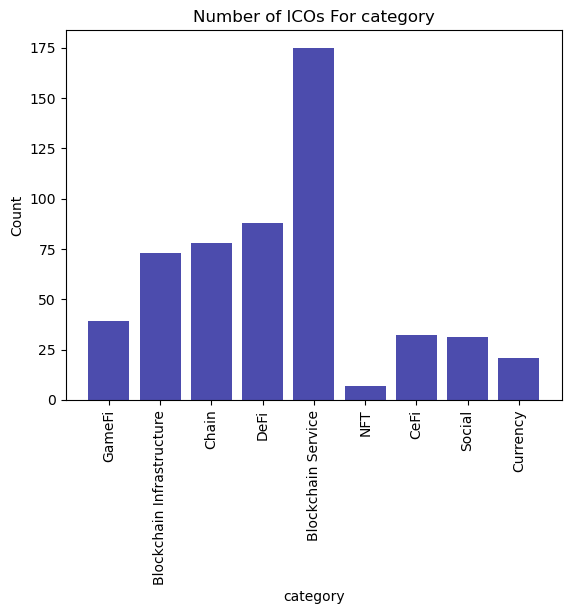

In [451]:
category_list = df_venture['Category']
category_counts = Counter(category_list)


# 提取年份和计数
categorys = list(category_counts.keys())
categorys = [item for item in categorys if type(item)==type('str')]
counts = [int(category_counts.get(key)) for key in categorys]
print(pd.DataFrame({ 'Category': categorys, 'Count': counts }))
# 创建柱状图
plt.bar(categorys, counts, color='darkblue', alpha=0.7)

# 添加标签和标题
plt.xlabel('category')
plt.ylabel('Count')
plt.title('Number of ICOs For category')
plt.xticks(rotation = 90)

# 显示图形
plt.show()

     year  Failures  Successes
0  2014.0         0          1
1  2015.0         0          3
2  2016.0         3          4
3  2017.0        39        188
4  2018.0        82        231
5  2019.0         3         23
6  2020.0         4         37
7  2021.0         3         55
8  2022.0         2         27
9  2023.0         0         10


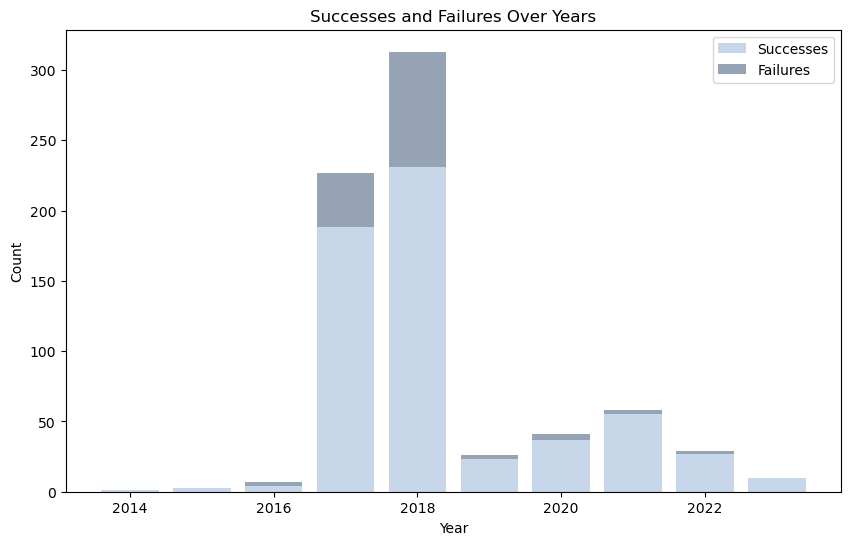

In [437]:
df_1 = df_venture.loc[:,['ICO Start', 'Success']]
df_1['year'] = df_1['ICO Start'].apply(lambda x: x.year)

# Group by year and success, then count the occurrences
grouped_df = df_1.groupby(['year', 'Success']).size().unstack(fill_value=0)

# Rename the columns for clarity
grouped_df.columns = ['Failures', 'Successes']

# Reset the index to make 'year' a regular column
grouped_df = grouped_df.reset_index()

# Display the result
print(grouped_df)

# Plot the data
plt.figure(figsize=(10, 6))

plt.bar(grouped_df['year'], grouped_df['Successes'], label='Successes', color='#B0C6E1', alpha=0.7)#DDEAF7
plt.bar(grouped_df['year'], grouped_df['Failures'], bottom=grouped_df['Successes'], label='Failures', color='#687C94', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Successes and Failures Over Years')
plt.legend()
plt.show()


     year  Other  Ethereum
0  2015.0      1         1
1  2016.0      1         6
2  2017.0     31       174
3  2018.0     30       246
4  2019.0      5        15
5  2020.0     10        22
6  2021.0     24        29
7  2022.0     15         8
8  2023.0      5         2


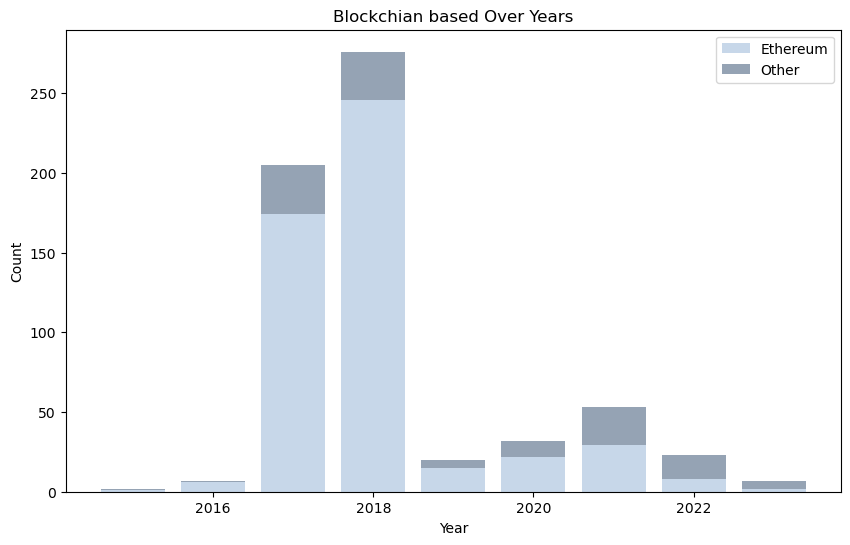

In [424]:
df_1 = df_venture.loc[:,['ICO Start', 'is_Ethereum']]
df_1['year'] = df_1['ICO Start'].apply(lambda x: x.year)

# Group by year and success, then count the occurrences
grouped_df = df_1.groupby(['year', 'is_Ethereum']).size().unstack(fill_value=0)

# Rename the columns for clarity
grouped_df.columns = ['Other', 'Ethereum']

# Reset the index to make 'year' a regular column
grouped_df = grouped_df.reset_index()

# Display the result
print(grouped_df)

# Plot the data
plt.figure(figsize=(10, 6))

plt.bar(grouped_df['year'], grouped_df['Ethereum'], label='Ethereum', color='#B0C6E1', alpha=0.7)#DDEAF7
plt.bar(grouped_df['year'], grouped_df['Other'], bottom=grouped_df['Ethereum'], label='Other', color='#687C94', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Blockchian based Over Years')
plt.legend()
plt.show()


Category    year  Blockchain Infrastructure  Blockchain Service  CeFi  Chain  \
0         2014.0                          0                   0     0      1   
1         2015.0                          0                   0     0      2   
2         2016.0                          0                   3     1      2   
3         2017.0                         23                  61    15     16   
4         2018.0                         33                  77    12     25   
5         2019.0                          5                   7     1      6   
6         2020.0                          1                   4     1     10   
7         2021.0                          4                  10     1      9   
8         2022.0                          2                   6     1      2   
9         2023.0                          2                   1     0      3   

Category  Currency  DeFi  GameFi  NFT  Social  
0                0     0       0    0       0  
1                0     

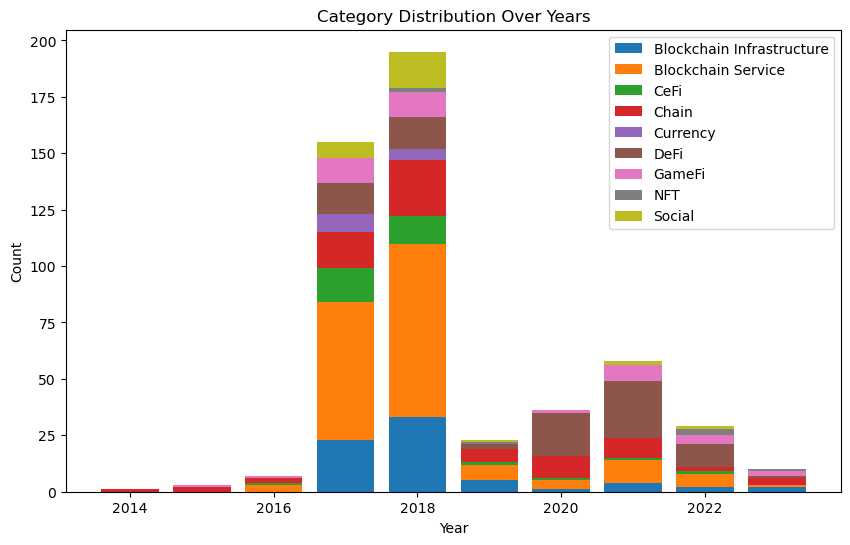

In [418]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already imported your DataFrame df_venture

# Extract year and Category from ICO Start in df_venture
df_1 = df_venture.loc[:, ['ICO Start', 'Category']]
df_1['year'] = df_1['ICO Start'].apply(lambda x: x.year)

# Group by year and Category, then count the occurrences
grouped_df = df_1.groupby(['year', 'Category']).size().unstack(fill_value=0)

# Reset the index to make 'year' a regular column
grouped_df = grouped_df.reset_index()

# Display the result
print(grouped_df)

plt.figure(figsize=(10, 6))

# Iterate through each category and plot a stacked bar for each
bottom = None
for category in grouped_df.columns[1:]:
    plt.bar(grouped_df['year'], grouped_df[category], label=category, bottom=bottom)
    if bottom is None:
        bottom = grouped_df[category].values
    else:
        bottom += grouped_df[category].values

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Category Distribution Over Years')
plt.legend()
plt.show()

                    Category  Failures  Successes  All
0  Blockchain Infrastructure        13         60   73
1         Blockchain Service        22        153  175
2                       CeFi         4         28   32
3                      Chain         5         73   78
4                   Currency        12          9   21
5                       DeFi        13         75   88
6                     GameFi         7         32   39
7                        NFT         2          5    7
8                     Social        12         19   31


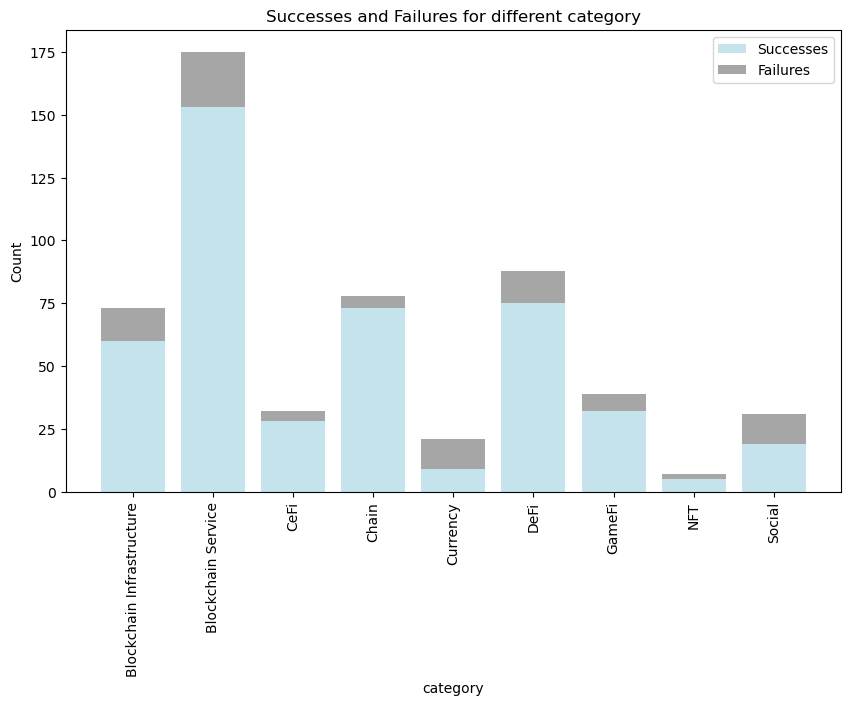

In [224]:
df_2 = df_venture.loc[:,['Category', 'Success']]

# Group by year and success, then count the occurrences
grouped_df = df_2.groupby(['Category', 'Success']).size().unstack(fill_value=0)

# Rename the columns for clarity
grouped_df.columns = ['Failures', 'Successes']



# Reset the index to make 'year' a regular column
grouped_df = grouped_df.reset_index()
grouped_df['All'] = grouped_df['Successes']+grouped_df['Failures']

# Display the result
print(grouped_df)

# Plot the data
plt.figure(figsize=(10, 6))

plt.bar(grouped_df['Category'], grouped_df['Successes'], label='Successes', color='lightblue', alpha=0.7)
plt.bar(grouped_df['Category'], grouped_df['Failures'], bottom=grouped_df['Successes'], label='Failures', color='grey', alpha=0.7)

plt.xlabel('category')
plt.ylabel('Count')
plt.title('Successes and Failures for different category')
plt.xticks(rotation=90)


plt.legend()
plt.show()


     Group  Count                 Label
0  Group 1    137         Group 1:1 day
1  Group 2    130      Group 2:2-5 days
2  Group 3     55     Group 3:6-10 days
3  Group 4     78    Group 4:11-20 days
4  Group 5     92    Group 5:21-30 days
5  Group 6    109    Group 6:31-40 days
6  Group 7     43    Group 7:41-60 days
7  Group 8     47   Group 8:61-100 days
8  Group 9     24  Group 9:100-400 days


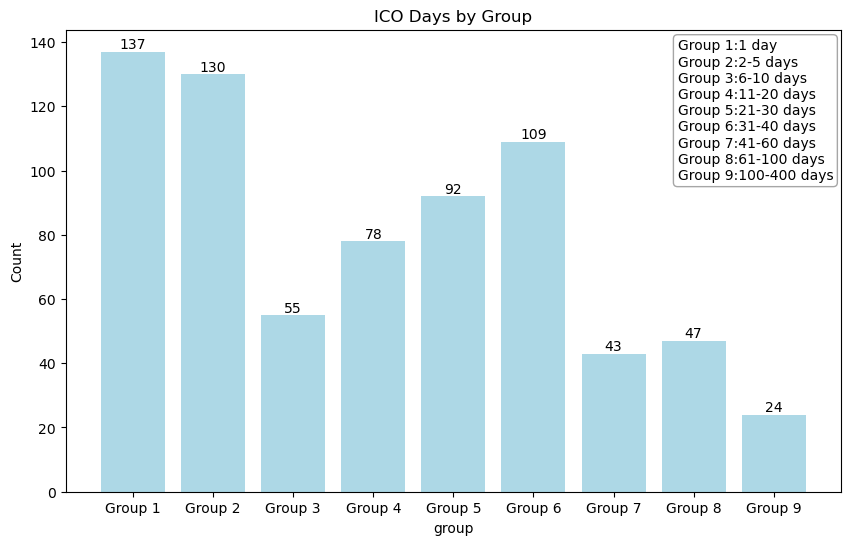

In [191]:
# Define bin edges
bins = [0, 1, 5, 10, 20, 30, 40, 60, 100, 400]
bin_labels = [f'Group {i+1}' for i in range(len(bins)-1)]


df_3 = df_venture.loc[:,['ICO Days', 'Success']]
# Create a new column 'group' based on the bin intervals
df_3['group'] = pd.cut(df_3['ICO Days'], bins=bins, labels=bin_labels)

# Plot the distribution for each group
groups = df_3.groupby('group').size()#.unstack(fill_value=0)
# Rename the columns for clarity


# Reset the index to make 'year' a regular column
groups = groups.reset_index()
groups.columns = ['Group','Count']
groups['Label'] = ['Group 1:1 day',
                   'Group 2:2-5 days',
                   'Group 3:6-10 days',
                   'Group 4:11-20 days',
                   'Group 5:21-30 days',
                   'Group 6:31-40 days',
                   'Group 7:41-60 days',
                   'Group 8:61-100 days',
                   'Group 9:100-400 days']
print(groups)

plt.figure(figsize=(10, 6))
plt.bar(groups['Group'],groups['Count'],label=groups['Label'],color='lightblue')
# Adding labels and title

plt.xlabel('group')
plt.ylabel('Count')
plt.title('ICO Days by Group')

# Display count on top of each bar
for i, value in enumerate(groups['Count']):
    plt.text(i, value, str(value), ha='center', va='bottom')

box_text = '\n'.join(groups['Label'])
plt.text(len(groups) - 2.2, len(groups['Label']) +132 , box_text,
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.7),
         ha='left', va='top', fontsize=10)

# Show the plot
plt.show()

     Group  Count                     Label
0  Group 1    578      group 1:up to $0.000
1  Group 2     59      group 2:up to $0.405
2  Group 3     20      group 3:up to $0.693
3  Group 4     43      group 4:up to $0.916
4  Group 5     12      group 5:up to $1.099
5  Group 6      4  group 8:more than $1.253


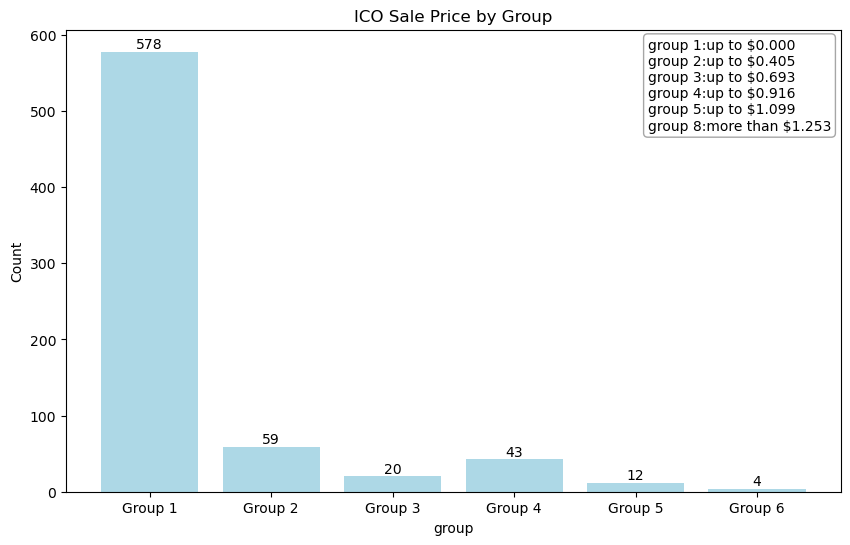

In [198]:
# Define bin edges
bins = [np.log(i/2) for i in range(2,9,1)]
bin_labels = [f'Group {i+1}' for i in range(len(bins)-1)]


df_4 = df_venture.loc[:,['Sale Price', 'Success']]
# Create a new column 'group' based on the bin intervals
df_4['group'] = pd.cut(df_4['Sale Price'], bins=bins, labels=bin_labels)

# Plot the distribution for each group
groups = df_4.groupby('group').size()#.unstack(fill_value=0)
# Rename the columns for clarity


# Reset the index to make 'year' a regular column
groups = groups.reset_index()
groups.columns = ['Group','Count']
groups['Label'] = [f'group {i}:up to ${np.log((i+1)/2):.3f}' for i in range(1,6)]+[f'group 7:more than ${np.log(3.5):.3f}']
print(groups)


plt.figure(figsize=(10, 6))
plt.bar(groups['Group'],groups['Count'],label=groups['Label'],color='lightblue')
# Adding labels and title

plt.xlabel('group')
plt.ylabel('Count')
plt.title('ICO Sale Price by Group')
for i, value in enumerate(groups['Count']):
    plt.text(i , value, str(value), ha='center', va='bottom')
box_text = '\n'.join(groups['Label'])
plt.text(len(groups) - 1.9, len(groups['Label']) +590 , box_text,
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.7),
         ha='left', va='top', fontsize=10)

# Show the plot
plt.show()

In [235]:
l = df_venture[df_venture['ICO Raised']>0]['ICO Raised'].apply(np.log)
#print(f'{sorted(l,reverse=True)}')
print(f'max:{max(l)}. min:{min(l)}')

max:23.007177664674835. min:9.210340371976184


       Group  Count                              Label
0    Group 1      3           group 1:up to $22026.466
1    Group 2      4           group 2:up to $59874.142
2    Group 3     10          group 3:up to $162754.791
3    Group 4     14          group 4:up to $442413.392
4    Group 5     28         group 5:up to $1202604.284
5    Group 6     51         group 6:up to $3269017.372
6    Group 7     88         group 7:up to $8886110.521
7    Group 8    223        group 8:up to $24154952.754
8    Group 9    131        group 9:up to $65659969.137
9   Group 10     20      group 10:up to $178482300.963
10  Group 11      7  group 11:more than $178482300.963


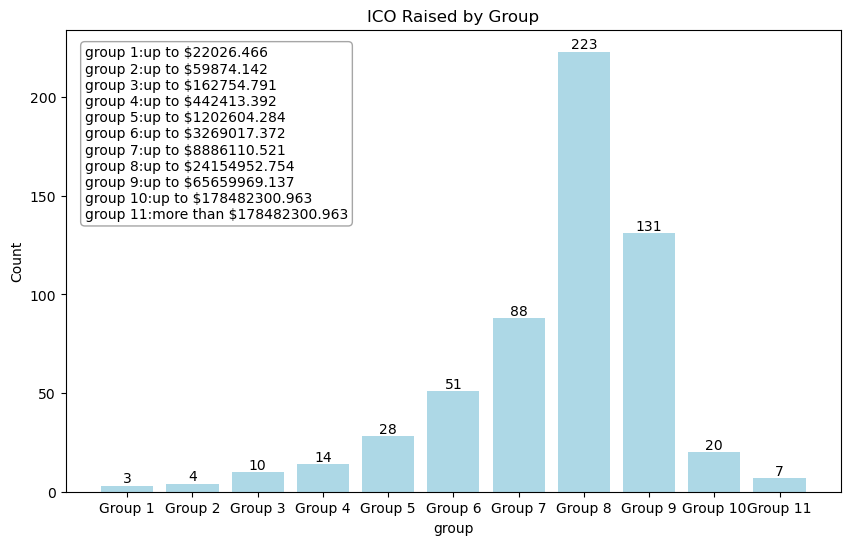

In [208]:
# Define bin edges
bins = list(range(9,20,1))+[24]
bin_labels = [f'Group {i+1}' for i in range(len(bins)-1)]


df_5 = df_venture.loc[:,['ICO Raised', 'Success']]
df_5['Log ICO Raised'] = df_5['ICO Raised'].apply(np.log)
# Create a new column 'group' based on the bin intervals
df_5['group'] = pd.cut(df_5['Log ICO Raised'], bins=bins, labels=bin_labels)

# Plot the distribution for each group
groups = df_5.groupby('group').size()#.unstack(fill_value=0)
# Rename the columns for clarity


# Reset the index to make 'year' a regular column
groups = groups.reset_index()
groups.columns = ['Group','Count']
groups['Label'] = [f'group {i-9}:up to ${np.exp(i):.3f}' for i in range(10,20)]+[f'group 11:more than ${np.exp(19):.3f}']
print(groups)

plt.figure(figsize=(10, 6))
plt.bar(groups['Group'],groups['Count'],label=groups['Label'],color='lightblue')
# Adding labels and title

plt.xlabel('group')
plt.ylabel('Count')
plt.title('ICO Raised by Group')
for i, value in enumerate(groups['Count']):
    plt.text(i , value, str(value), ha='center', va='bottom')

box_text = '\n'.join(groups['Label'])
plt.text(len(groups) - 11.65, len(groups['Label']) +215 , box_text,
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.7),
         ha='left', va='top', fontsize=10)
# Show the plot
plt.show()

     Year  Total ICO Raised  Average ICO Raised per Transaction
0  2014.0          18300000                        1.830000e+07
1  2015.0           7905000                        2.635000e+06
2  2016.0          76614847                        1.094498e+07
3  2017.0        9098930241                        4.008339e+07
4  2018.0       19329253646                        6.175480e+07
5  2019.0         319370657                        1.228349e+07
6  2020.0         321251792                        7.835410e+06
7  2021.0         884078633                        1.524274e+07
8  2022.0         366903894                        1.265186e+07
9  2023.0          78194474                        7.819447e+06


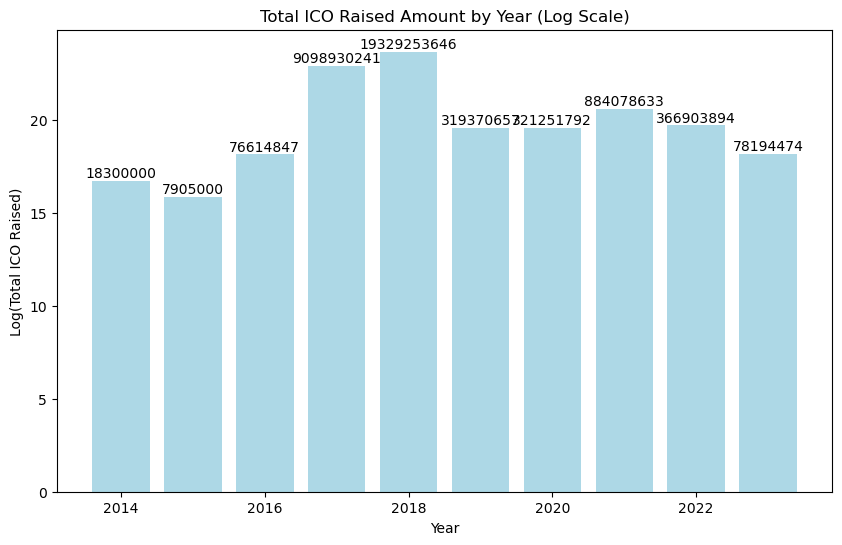

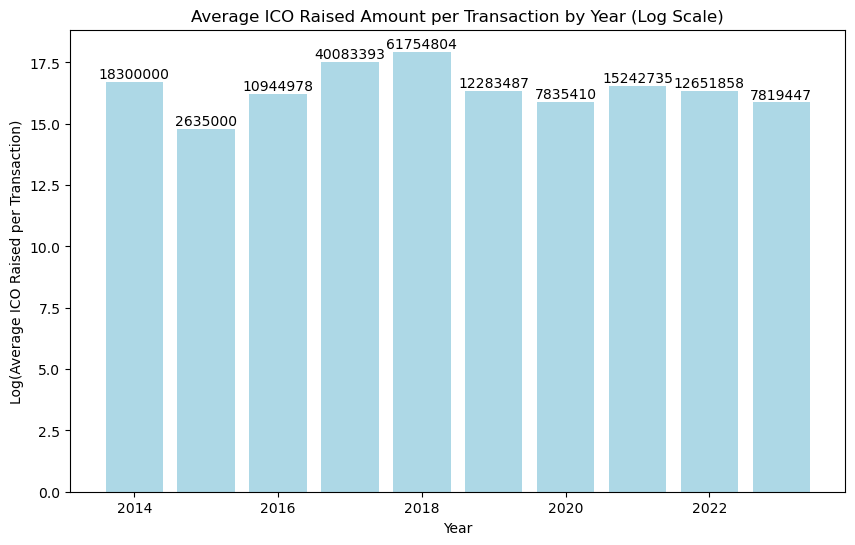

In [220]:


df_6 = df_venture.loc[:,['ICO Raised','ICO Start', 'Success']]

# Extract the year from the 'ICO Start' column
df_6['year'] = df_6['ICO Start'].apply(lambda x: x.year)

# Calculate the total ICO Raised amount for each year
total_raised_per_year = df_6.groupby('year')['ICO Raised'].sum().reset_index()
total_raised_per_year.columns = ['Year', 'Total ICO Raised']

# Calculate the average ICO Raised amount per transaction for each year
average_raised_per_transaction = df_6.groupby('year')['ICO Raised'].mean().reset_index()
average_raised_per_transaction.columns = ['Year', 'Average ICO Raised per Transaction']

# Merge the two dataframes on the 'Year' column
result_df = pd.merge(total_raised_per_year, average_raised_per_transaction, on='Year')

# Print the result
print(result_df)

plt.figure(figsize=(10, 6))
bars = plt.bar(result_df['Year'], result_df['Total ICO Raised'].apply(np.log), color='lightblue')
plt.xlabel('Year')
plt.ylabel('Log(Total ICO Raised)')
plt.title('Total ICO Raised Amount by Year (Log Scale)')
for bar, value in zip(bars, result_df['Total ICO Raised']):
    plt.text(bar.get_x() + bar.get_width() / 2, np.log(value) + 0.02, f'{value:.0f}', ha='center', va='bottom')

plt.show()

# Plot the average ICO Raised amount per transaction for each year on a logarithmic scale
plt.figure(figsize=(10, 6))
plt.bar(result_df['Year'], result_df['Average ICO Raised per Transaction'].apply(np.log), color='lightblue')
plt.xlabel('Year')
plt.ylabel('Log(Average ICO Raised per Transaction)')
plt.title('Average ICO Raised Amount per Transaction by Year (Log Scale)')
for bar, value in zip(bars, result_df['Average ICO Raised per Transaction']):
    plt.text(bar.get_x() + bar.get_width() / 2, np.log(value) + 0.02, f'{value:.0f}', ha='center', va='bottom')

plt.show()

In [438]:
df_count = df_venture.loc[:, ['Success','Category','ICO Start','is_Ethereum','is_hardcap','is_softcap','is_twitter','is_investor','ICO Days','code_available']]
df_count['year'] = df_count['ICO Start'].apply(lambda x: x.year)


grouped_df = df_count.groupby(['Success']).size()
print(grouped_df)

grouped_df = df_count.groupby(['Category']).size()
print(grouped_df)

grouped_df = df_count.groupby(['is_Ethereum']).size()
print(grouped_df)

grouped_df = df_count.groupby(['is_hardcap']).size()
print(grouped_df)

grouped_df = df_count.groupby(['is_softcap']).size()
print(grouped_df)

grouped_df = df_count.groupby(['is_twitter']).size()
print(grouped_df)

grouped_df = df_count.groupby(['is_investor']).size()
print(grouped_df)

grouped_df = df_count.groupby(['code_available']).size()
print(grouped_df)

Success
False    215
True     579
dtype: int64
Category
Blockchain Infrastructure     73
Blockchain Service           175
CeFi                          32
Chain                         78
Currency                      21
DeFi                          88
GameFi                        39
NFT                            7
Social                        31
dtype: int64
is_Ethereum
False    133
True     541
dtype: int64
is_hardcap
False    247
True     547
dtype: int64
is_softcap
False    770
True      24
dtype: int64
is_twitter
False    224
True     570
dtype: int64
is_investor
False    537
True     257
dtype: int64
code_available
False    315
True     479
dtype: int64


In [366]:
df_venture.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Project', 'Abbr', 'Link', 'Sale Price',
       'ROI', 'Total Raise', 'Launchpad', 'Ended', 'When', 'Funds', 'Type',
       'Raise', 'Initial Cap', 'Market Cap', 'Blockchain', 'Category',
       'Listing Date', 'ATH ROI', 'ICO Days', 'Rounds', 'ICO Order', 'Social',
       'Funds and Investors', 'Investor Count', 'ICO Start', 'ICO End',
       'Soft Cap', 'Hard Cap', 'ICO Raised', 'Other Link', 'Success', 'github',
       'code_available', 'social_media', 'is_Ethereum', 'expert', 'is_hardcap',
       'is_softcap', 'is_investor', 'after18', 'twitter', 'is_twitter'],
      dtype='object')

### For Model building

In [265]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [478]:
#df_venture['is_Ethereum'] = df_venture['is_Ethereum'].fillna(False)
df_regression =df_venture[['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','Category','is_softcap','Soft Cap','is_hardcap','Hard Cap',
           'Sale Price','after18','is_Ethereum','ICO Days','ICO Raised','ATH ROI']]
df_regression['is_tradable'] = ~df_regression['ATH ROI'].isnull()
df_regression['blockchain_tech'] = (df_regression['Category']=='Blockchain Infrastructure')|(df_regression['Category']=='Chain')
df_regression['service_finance'] = (df_regression['Category']=='Blockchain Service')|(df_regression['Category']=='CeFi')|(df_regression['Category']=='DeFi')
df_regression['digital_assets'] = (df_regression['Category']=='Currency')|(df_regression['Category']=='NFT')
df_regression['application'] = (df_regression['Category']=='GameFi')|(df_regression['Category']=='Social')

df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Success          794 non-null    bool           
 1   code_available   794 non-null    bool           
 2   is_twitter       794 non-null    bool           
 3   is_investor      794 non-null    bool           
 4   Investor Count   794 non-null    int64          
 5   ICO Order        794 non-null    int64          
 6   Category         544 non-null    object         
 7   is_softcap       794 non-null    bool           
 8   Soft Cap         24 non-null     float64        
 9   is_hardcap       794 non-null    bool           
 10  Hard Cap         547 non-null    float64        
 11  Sale Price       781 non-null    float64        
 12  after18          794 non-null    bool           
 13  is_Ethereum      674 non-null    object         
 14  ICO Days         715 non-n

/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/727510489.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regression['is_tradable'] = ~df_regression['ATH ROI'].isnull()
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/727510489.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regression['blockchain_tech'] = (df_regression['Category']=='Blockchain Infrastructure')|(df_regression['Category']=='Chain')
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_9776

In [303]:
def get_model_df(lst):
     df = df_regression[lst]
     for column in lst:
          df = df.loc[~df[column].isna(),]
     return df


In [440]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum',
           'Sale Price','after18','is_tradable']
df_model1 = get_model_df(var_list)
df_model1['before19'] = ~df_model1['after18']
print(df_model1.info())

df_model1['is_presupport'] = df_model1['ICO Order']>1
df_model1['sale_price_log'] = df_model1['Sale Price'].apply(lambda x:np.log(x+1))


X = df_model1[['code_available','is_Ethereum','is_twitter','is_tradable',
           'is_softcap','is_hardcap','is_investor',
           'sale_price_log']]
#X['before18*code_available'] = X['before18']*X['code_available']
for co in X.columns.to_list():
     if co =='sale_price_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model1['Success']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 793
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Success         664 non-null    bool   
 1   code_available  664 non-null    bool   
 2   is_twitter      664 non-null    bool   
 3   is_investor     664 non-null    bool   
 4   Investor Count  664 non-null    int64  
 5   ICO Order       664 non-null    int64  
 6   is_softcap      664 non-null    bool   
 7   is_hardcap      664 non-null    bool   
 8   is_Ethereum     664 non-null    object 
 9   Sale Price      664 non-null    float64
 10  after18         664 non-null    bool   
 11  is_tradable     664 non-null    bool   
 12  before19        664 non-null    bool   
dtypes: bool(9), float64(1), int64(2), object(1)
memory usage: 31.8+ KB
None
                code_available  is_Ethereum  is_twitter  is_tradable  \
code_available        1.000000     0.097858    0.242276     0.087818   
is_E

/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/3750007086.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/3750007086.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/3750007086.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [463]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum',
           'Sale Price','after18','is_tradable']
df_model1 = get_model_df(var_list)
df_model1['before19'] = ~df_model1['after18']
print(df_model1.info())

df_model1['is_presupport'] = df_model1['ICO Order']>1
df_model1['sale_price_log'] = df_model1['Sale Price'].apply(lambda x:np.log(x+1))


X = df_model1[['code_available','is_Ethereum','is_twitter','is_tradable',
           'is_softcap','is_hardcap','is_investor',
           'sale_price_log']]
X['code_available:is_investor'] = (X['is_investor'])*X['code_available']

for co in X.columns.to_list():
     if co =='sale_price_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model1['Success']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 793
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Success         664 non-null    bool   
 1   code_available  664 non-null    bool   
 2   is_twitter      664 non-null    bool   
 3   is_investor     664 non-null    bool   
 4   Investor Count  664 non-null    int64  
 5   ICO Order       664 non-null    int64  
 6   is_softcap      664 non-null    bool   
 7   is_hardcap      664 non-null    bool   
 8   is_Ethereum     664 non-null    object 
 9   Sale Price      664 non-null    float64
 10  after18         664 non-null    bool   
 11  is_tradable     664 non-null    bool   
 12  before19        664 non-null    bool   
dtypes: bool(9), float64(1), int64(2), object(1)
memory usage: 31.8+ KB
None
                            code_available  is_Ethereum  is_twitter  \
code_available                    1.000000     0.097858    0.242276   
is_Eth

/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/2556359494.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['code_available:is_investor'] = (X['is_investor'])*X['code_available']
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/2556359494.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/2556359494.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [466]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum',
           'Sale Price','after18','is_tradable']
df_model1 = get_model_df(var_list)
df_model1['before19'] = ~df_model1['after18']
print(df_model1.info())

df_model1['is_presupport'] = df_model1['ICO Order']>1
df_model1['sale_price_log'] = df_model1['Sale Price'].apply(lambda x:np.log(x+1))


X = df_model1[['code_available','is_Ethereum','is_twitter','is_tradable',
           'is_softcap','is_hardcap','before19','is_investor',
           'sale_price_log']]
X['code_available:is_investor'] = (X['is_investor'])*X['code_available']

for co in X.columns.to_list():
     if co =='sale_price_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model1['Success']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 793
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Success         664 non-null    bool   
 1   code_available  664 non-null    bool   
 2   is_twitter      664 non-null    bool   
 3   is_investor     664 non-null    bool   
 4   Investor Count  664 non-null    int64  
 5   ICO Order       664 non-null    int64  
 6   is_softcap      664 non-null    bool   
 7   is_hardcap      664 non-null    bool   
 8   is_Ethereum     664 non-null    object 
 9   Sale Price      664 non-null    float64
 10  after18         664 non-null    bool   
 11  is_tradable     664 non-null    bool   
 12  before19        664 non-null    bool   
dtypes: bool(9), float64(1), int64(2), object(1)
memory usage: 31.8+ KB
None
                            code_available  is_Ethereum  is_twitter  \
code_available                    1.000000     0.097858    0.242276   
is_Eth

/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/418787848.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['code_available:is_investor'] = (X['is_investor'])*X['code_available']
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/418787848.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/418787848.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [467]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 打印VIF
print(vif_data)

                      Variable        VIF
0                        const  42.992162
1               code_available   1.671076
2                  is_Ethereum   1.146675
3                   is_twitter   1.072397
4                  is_tradable   1.062799
5                   is_softcap   1.061182
6                   is_hardcap   1.155530
7                     before19   1.445737
8                  is_investor   2.826184
9               sale_price_log   1.013523
10  code_available:is_investor   2.699032


In [469]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap',
           'Sale Price','after18','is_Ethereum','is_tradable']
df_model2 = get_model_df(var_list)
df_model2 = df_model2[df_model2['after18']]

print(df_model2.info())


df_model2['is_presupport'] = df_model2['ICO Order']>1
df_model2['sale_price_log'] = df_model2['Sale Price'].apply(lambda x:np.log(x+1))


X = df_model2[['code_available','is_Ethereum','is_twitter','is_tradable',
           'is_softcap','is_hardcap','is_investor',
           'sale_price_log']]
#X['code_available:is_investor'] = (X['is_investor'])*X['code_available']
for co in X.columns.to_list():
     if co =='sale_price_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model2['Success']


#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 0 to 785
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Success         131 non-null    bool   
 1   code_available  131 non-null    bool   
 2   is_twitter      131 non-null    bool   
 3   is_investor     131 non-null    bool   
 4   Investor Count  131 non-null    int64  
 5   ICO Order       131 non-null    int64  
 6   is_softcap      131 non-null    bool   
 7   is_hardcap      131 non-null    bool   
 8   Sale Price      131 non-null    float64
 9   after18         131 non-null    bool   
 10  is_Ethereum     131 non-null    object 
 11  is_tradable     131 non-null    bool   
dtypes: bool(8), float64(1), int64(2), object(1)
memory usage: 6.1+ KB
None
                            code_available  is_Ethereum  is_twitter  \
code_available                    1.000000     0.053824    0.252837   
is_Ethereum                       0.053824     1.000

/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/1599691726.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['code_available:is_investor'] = (X['is_investor'])*X['code_available']
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/1599691726.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/1599691726.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [471]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_tradable',
           'Sale Price','after18','is_Ethereum']
df_model3 = get_model_df(var_list)
df_model3 = df_model3[~df_model3['after18']]

print(df_model3.info())

df_model3['is_presupport'] = df_model3['ICO Order']>1
df_model3['sale_price_log'] = df_model3['Sale Price'].apply(lambda x:np.log(x+1))


X = df_model3[['code_available','is_Ethereum','is_twitter','is_tradable',
           'is_softcap','is_hardcap','is_investor',
           'sale_price_log']]
#X['code_available:is_investor'] = (X['is_investor'])*X['code_available']
for co in X.columns.to_list():
     if co =='sale_price_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model3['Success']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 136 to 793
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Success         533 non-null    bool   
 1   code_available  533 non-null    bool   
 2   is_twitter      533 non-null    bool   
 3   is_investor     533 non-null    bool   
 4   Investor Count  533 non-null    int64  
 5   ICO Order       533 non-null    int64  
 6   is_softcap      533 non-null    bool   
 7   is_hardcap      533 non-null    bool   
 8   is_tradable     533 non-null    bool   
 9   Sale Price      533 non-null    float64
 10  after18         533 non-null    bool   
 11  is_Ethereum     533 non-null    object 
dtypes: bool(8), float64(1), int64(2), object(1)
memory usage: 25.0+ KB
None
                            code_available  is_Ethereum  is_twitter  \
code_available                    1.000000     0.024775    0.244923   
is_Ethereum                       0.024775     1.

/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/102738869.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['code_available:is_investor'] = (X['is_investor'])*X['code_available']
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/102738869.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/102738869.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [476]:
df_regression.columns

Index(['Success', 'code_available', 'is_twitter', 'is_investor',
       'Investor Count', 'ICO Order', 'Category', 'is_softcap', 'Soft Cap',
       'is_hardcap', 'Hard Cap', 'Sale Price', 'after18', 'is_Ethereum',
       'ICO Days', 'ICO Raised', 'ATH ROI', 'is_tradable', 'blockchain_tech',
       'service_finance', 'digital_assets'],
      dtype='object')

In [480]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum',
           'Sale Price','after18','is_tradable', 'blockchain_tech',
       'service_finance', 'digital_assets','application']
df_model4 = get_model_df(var_list)
df_model4['before19'] = ~df_model4['after18']
print(df_model4.info())

df_model4['is_presupport'] = df_model4['ICO Order']>1
df_model4['sale_price_log'] = df_model4['Sale Price'].apply(lambda x:np.log(x+1))


X = df_model4[['code_available','is_Ethereum','is_twitter','is_tradable',
           'is_softcap','is_hardcap','before19','is_investor',
           'sale_price_log', 'blockchain_tech','service_finance', 'digital_assets','application']]
#X['blockchain_tech:is_tradable'] = (X['blockchain_tech'])&(X['is_tradable'])
for co in X.columns.to_list():
     if co =='sale_price_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model4['Success']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 793
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Success          664 non-null    bool   
 1   code_available   664 non-null    bool   
 2   is_twitter       664 non-null    bool   
 3   is_investor      664 non-null    bool   
 4   Investor Count   664 non-null    int64  
 5   ICO Order        664 non-null    int64  
 6   is_softcap       664 non-null    bool   
 7   is_hardcap       664 non-null    bool   
 8   is_Ethereum      664 non-null    object 
 9   Sale Price       664 non-null    float64
 10  after18          664 non-null    bool   
 11  is_tradable      664 non-null    bool   
 12  blockchain_tech  664 non-null    bool   
 13  service_finance  664 non-null    bool   
 14  digital_assets   664 non-null    bool   
 15  application      664 non-null    bool   
 16  before19         664 non-null    bool   
dtypes: bool(13), float64(

/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/895909988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/895909988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/895909988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [487]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum',
           'Sale Price','after18','is_tradable', 'blockchain_tech',
       'service_finance', 'digital_assets','application']
df_model4 = get_model_df(var_list)
df_model4['before19'] = ~df_model4['after18']
#print(df_model4.info())

df_model4['is_presupport'] = df_model4['ICO Order']>1
df_model4['sale_price_log'] = df_model4['Sale Price'].apply(lambda x:np.log(x+1))


X = df_model4[['code_available','is_Ethereum','is_twitter','is_tradable',
           'is_softcap','is_hardcap','is_investor',
           'sale_price_log', 'blockchain_tech','service_finance', 'digital_assets','application']]
#X['application:is_tradable'] = (X['application'])&(X['is_tradable'])
for co in X.columns.to_list():
     if co =='sale_price_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
#print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model4['Success']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.179352
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Success   No. Observations:                  664
Model:                          Logit   Df Residuals:                      651
Method:                           MLE   Df Model:                           12
Date:                Mon, 25 Dec 2023   Pseudo R-squ.:                  0.6721
Time:                        15:01:21   Log-Likelihood:                -119.09
converged:                       True   LL-Null:                       -363.17
Covariance Type:            nonrobust   LLR p-value:                 7.299e-97
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.2575      0.965     -5.451      0.000      -7.148      -3.367
code_available

/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/741289087.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/741289087.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/741289087.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [488]:
df_venture.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Project', 'Abbr', 'Link',
       'Sale Price', 'ROI', 'Total Raise', 'Launchpad', 'Ended', 'When',
       'Funds', 'Type', 'Raise', 'Initial Cap', 'Market Cap', 'Blockchain',
       'Category', 'Listing Date', 'ATH ROI', 'ICO Days', 'Rounds',
       'ICO Order', 'Social', 'Funds and Investors', 'Investor Count',
       'ICO Start', 'ICO End', 'Soft Cap', 'Hard Cap', 'ICO Raised',
       'Other Link', 'Success', 'github', 'code_available', 'social_media',
       'is_Ethereum', 'expert', 'is_hardcap', 'is_softcap', 'is_investor',
       'after18', 'twitter', 'is_twitter'],
      dtype='object')

In [501]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum',
           'Sale Price','after18','is_tradable','ICO Raised','ICO Days']
df_model5 = get_model_df(var_list)
df_model5['before19'] = ~df_model5['after18']
df_model5 = df_model5[df_model5['Success']]
print(df_model5.info())

df_model5['is_presupport'] = df_model5['ICO Order']>1
df_model5['sale_price_log'] = df_model5['Sale Price'].apply(lambda x:np.log(x+1))
df_model5['raised_log'] = df_model5['ICO Raised'].apply(np.log)
df_model5['ICO Days'] = df_model5['ICO Days'].dt.days

X = df_model5[['code_available','is_Ethereum','is_twitter','is_tradable',
           'is_softcap','is_hardcap','Investor Count','ICO Days',
           'sale_price_log']]
#X['code_available:is_investor'] = (X['is_investor'])*X['code_available']

for co in X.columns.to_list():
     if co =='sale_price_log'or co =='raised_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model5['raised_log']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.OLS(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, 0 to 789
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Success         507 non-null    bool           
 1   code_available  507 non-null    bool           
 2   is_twitter      507 non-null    bool           
 3   is_investor     507 non-null    bool           
 4   Investor Count  507 non-null    int64          
 5   ICO Order       507 non-null    int64          
 6   is_softcap      507 non-null    bool           
 7   is_hardcap      507 non-null    bool           
 8   is_Ethereum     507 non-null    object         
 9   Sale Price      507 non-null    float64        
 10  after18         507 non-null    bool           
 11  is_tradable     507 non-null    bool           
 12  ICO Raised      507 non-null    int64          
 13  ICO Days        507 non-null    timedelta64[ns]
 14  before19        507 non-null    bool           

/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/3968680450.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/3968680450.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/3968680450.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [505]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum',
           'Sale Price','after18','is_tradable','ICO Raised','ICO Days']
df_model5 = get_model_df(var_list)
df_model5['before19'] = ~df_model5['after18']
df_model5 = df_model5[df_model5['Success']]
print(df_model5.info())

df_model5['is_presupport'] = df_model5['ICO Order']>1
df_model5['sale_price_log'] = df_model5['Sale Price'].apply(lambda x:np.log(x+1))
df_model5['raised_log'] = df_model5['ICO Raised'].apply(np.log)
df_model5['ICO Days'] = df_model5['ICO Days'].dt.days

X = df_model5[['code_available','is_Ethereum','is_twitter','is_tradable',
           'is_softcap','is_hardcap','Investor Count','ICO Days','after18',
           'sale_price_log']]
#X['code_available:is_investor'] = (X['is_investor'])*X['code_available']

for co in X.columns.to_list():
     if co =='sale_price_log'or co =='raised_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model5['raised_log']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.OLS(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, 0 to 789
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Success         507 non-null    bool           
 1   code_available  507 non-null    bool           
 2   is_twitter      507 non-null    bool           
 3   is_investor     507 non-null    bool           
 4   Investor Count  507 non-null    int64          
 5   ICO Order       507 non-null    int64          
 6   is_softcap      507 non-null    bool           
 7   is_hardcap      507 non-null    bool           
 8   is_Ethereum     507 non-null    object         
 9   Sale Price      507 non-null    float64        
 10  after18         507 non-null    bool           
 11  is_tradable     507 non-null    bool           
 12  ICO Raised      507 non-null    int64          
 13  ICO Days        507 non-null    timedelta64[ns]
 14  before19        507 non-null    bool           

/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/4051152165.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/4051152165.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/4051152165.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [508]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum',
           'Sale Price','after18','is_tradable','ICO Raised','ICO Days']
df_model5 = get_model_df(var_list)
df_model5['before19'] = ~df_model5['after18']
df_model5 = df_model5[df_model5['Success']]
print(df_model5.info())

df_model5['is_presupport'] = df_model5['ICO Order']>1
df_model5['sale_price_log'] = df_model5['Sale Price'].apply(lambda x:np.log(x+1))
df_model5['raised_log'] = df_model5['ICO Raised'].apply(np.log)
df_model5['ICO Days'] = df_model5['ICO Days'].dt.days
#df_model5['hard_cap_log']= df_model5['Hard Cap'].apply(lambda x:np.log(x+1))

X = df_model5[['code_available','is_Ethereum','is_twitter','is_tradable',
           'is_hardcap','Investor Count','ICO Days','after18',
           'sale_price_log']]
#X['code_available:is_investor'] = (X['is_investor'])*X['code_available']

for co in X.columns.to_list():
     if co =='sale_price_log'or co =='raised_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model5['raised_log']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.OLS(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, 0 to 789
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Success         507 non-null    bool           
 1   code_available  507 non-null    bool           
 2   is_twitter      507 non-null    bool           
 3   is_investor     507 non-null    bool           
 4   Investor Count  507 non-null    int64          
 5   ICO Order       507 non-null    int64          
 6   is_softcap      507 non-null    bool           
 7   is_hardcap      507 non-null    bool           
 8   is_Ethereum     507 non-null    object         
 9   Sale Price      507 non-null    float64        
 10  after18         507 non-null    bool           
 11  is_tradable     507 non-null    bool           
 12  ICO Raised      507 non-null    int64          
 13  ICO Days        507 non-null    timedelta64[ns]
 14  before19        507 non-null    bool           

/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/2276585388.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/2276585388.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[co] = X[co].apply(int)
/var/folders/mr/h0bfb0g95qn80yxkwstrf9bc0000gn/T/ipykernel_97761/2276585388.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co